# Waffle Charts & Word Clouds

In [1]:
#Import and setup matplotlib:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

#Import Primary Modules:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

#install seaborn and wordcloud
# !pip install wordcloud 

In [61]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [62]:
df_can_copy = df_can.copy()
df_can_copy.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [63]:
#set Country as index
df_can.set_index('Country', inplace=True)

# Waffle Charts <a id="3"></a>

A `waffle chart` is an interesting visualization that is normally created to display progress toward goals. It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells, such as an Excel dashboard.

In [4]:
# let's create a new dataframe for Denmark, Norway, and Sweden countries 
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

# let's take a look at our dataframe
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


###### Unlike R, `waffle` charts are not built into any of the Python visualization libraries. Therefore, we will create them from scratch.

**Step 1.** The first step into creating a waffle chart is determing the proportion of each category with respect to the total.

In [5]:
# compute the proportion of each category with respect to the total
total_values = df_dsn['Total'].sum()
category_proportions = df_dsn['Total'] / total_values

# print out proportions
pd.DataFrame({"Category Proportion": category_proportions})

,Category Proportion
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


**Step 2.** The second step is defining the overall size of the `waffle` chart.

In [6]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print(f'Total number of tiles is {total_num_tiles}.')

Total number of tiles is 400.


**Step 3.** The third step is using the proportion of each category to determe it respective number of tiles

In [7]:
# compute the number of tiles for each category
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

# print out number of tiles per category
pd.DataFrame({"Number of tiles": tiles_per_category})

,Number of tiles
Country,
Denmark,129
Norway,77
Sweden,194


Based on the calculated proportions, Denmark will occupy 129 tiles of the `waffle` chart, Norway will occupy 77 tiles, and Sweden will occupy 194 tiles.

**Step 4.** The fourth step is creating a matrix that resembles the `waffle` chart and populating it.

In [8]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


In [9]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

**Step 5.** Map the `waffle` chart matrix into a visual.


/var/folders/7b/j31r7t691g31d5l6cckcpsnw0000gn/T/ipykernel_1871/3235023357.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<Figure size 432x288 with 0 Axes>

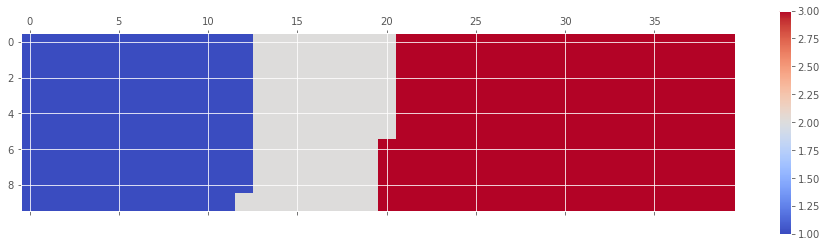

In [10]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
# plt.grid(False)
plt.colorbar()
plt.show()

**Step 6.** Prettify the chart.


/var/folders/7b/j31r7t691g31d5l6cckcpsnw0000gn/T/ipykernel_1871/1261046109.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


<Figure size 432x288 with 0 Axes>

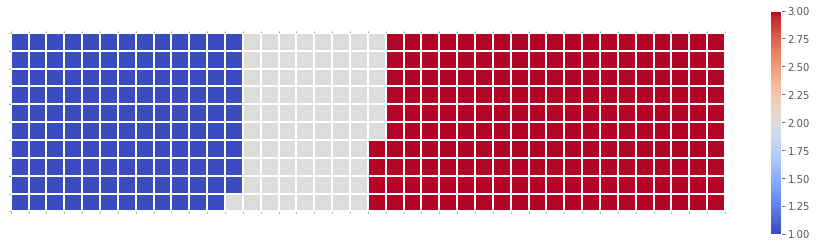

In [11]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

### Waffle Charts using PyWaffle

In [12]:
# !pip3 install pywaffle

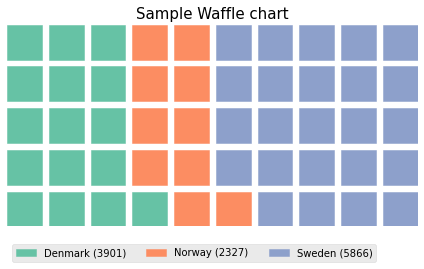

In [13]:
from pywaffle import Waffle

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=10,  
    values=tiles_per_category,
    title = {"label": "Sample Waffle chart", "loc": "Center", "size": 15},
    legend = {'labels': [f"{k} ({v})" for k, v in zip(df_dsn.index.values,df_dsn.Total)],
                            'loc': 'lower left', 'bbox_to_anchor':(0,-0.2),'ncol': 3}
)

In [14]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

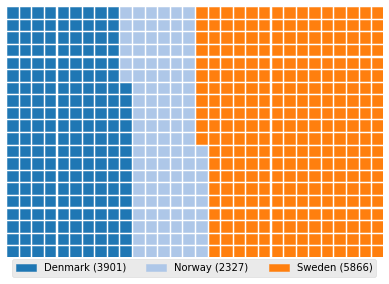

In [15]:
fig = plt.figure(FigureClass = Waffle,
                 rows = 20, columns = 30, #pass the number of rows and columns for the waffle 
                 values = df_dsn['Total'], #pass the data to be used for display
                 cmap_name = 'tab20', #color scheme
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(df_dsn.index.values,df_dsn.Total)],
                            'loc': 'lower left', 'bbox_to_anchor':(0,-0.1),'ncol': 3}
                 #notice the use of list comprehension for creating labels 
                 #from index and total of the dataset
                )

#Display the waffle chart
plt.show()

# Word Clouds <a id="4"></a>

`Word` clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.


A Python package already exists in Python for generating `word` clouds. The package, called `word_cloud` was developed by **Andreas Mueller**. More information in [link](https://github.com/amueller/word_cloud/).

In [16]:
# !pip3 install wordcloud

In [17]:
#import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS


`Word` clouds are commonly used to perform high-level analysis and visualization of text data. Accordinly, we will now work with an example that involves analyzing text data. We'll try to analyze a short novel written by **Lewis Carroll** titled *Alice's Adventures in Wonderland*. Let's go ahead and download a *.txt* file of the novel.

In [18]:
import urllib

# # open the file and read it into a variable alice_novel
alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

Next, we use the stopwords that we imported from `word_cloud`. We use the function *set* to remove any redundant stopwords.


In [19]:
stopwords = set(STOPWORDS)

In [20]:
# !pip install --upgrade pip

# !pip install --upgrade Pillow

In [21]:
# instantiate a word cloud object
alice_wc = WordCloud()

# generate the word cloud
alice_wc.generate(alice_novel)

In [22]:
type(alice_novel)

str

In [23]:
alice_novel

'\ufeffProject Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and w

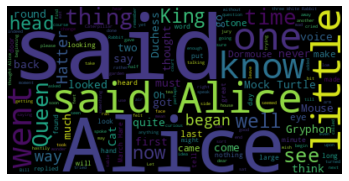

In [24]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

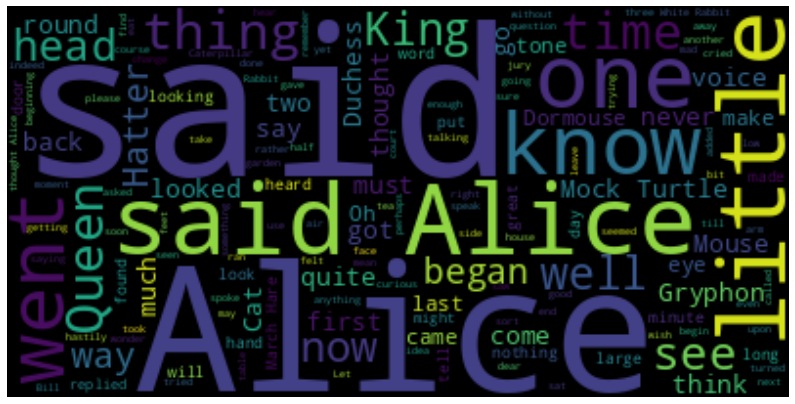

In [25]:
fig = plt.figure(figsize=(14, 18))

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Since sain is not am informative word so we add that in stopwards and regenerate the cloud

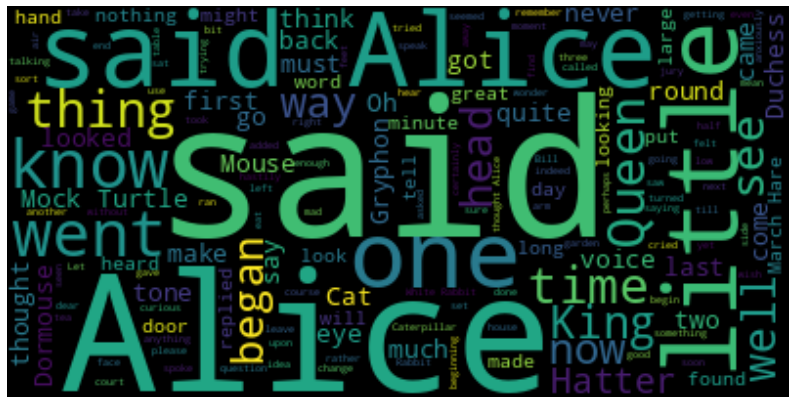

In [26]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### We can superimpose the words onto a mask of any shape. We will be using the mask that is already avaible in the following link ...

In [27]:
#save mask to alice_mask
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

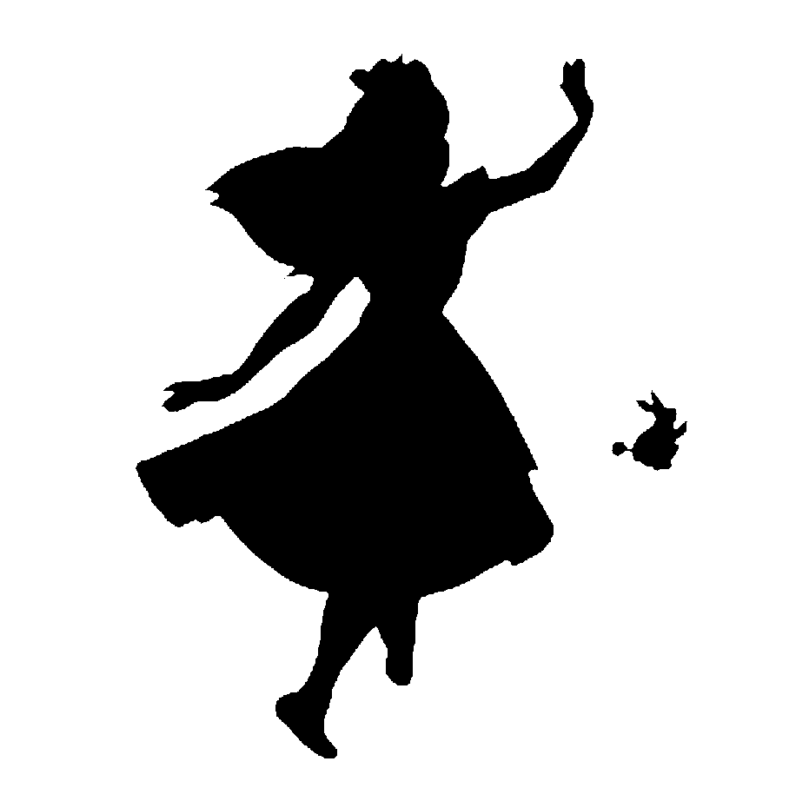

In [28]:
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Shaping the `word` cloud according to the mask is straightforward using `word_cloud` package. For simplicity, we will continue using the first 2000 words in the novel.

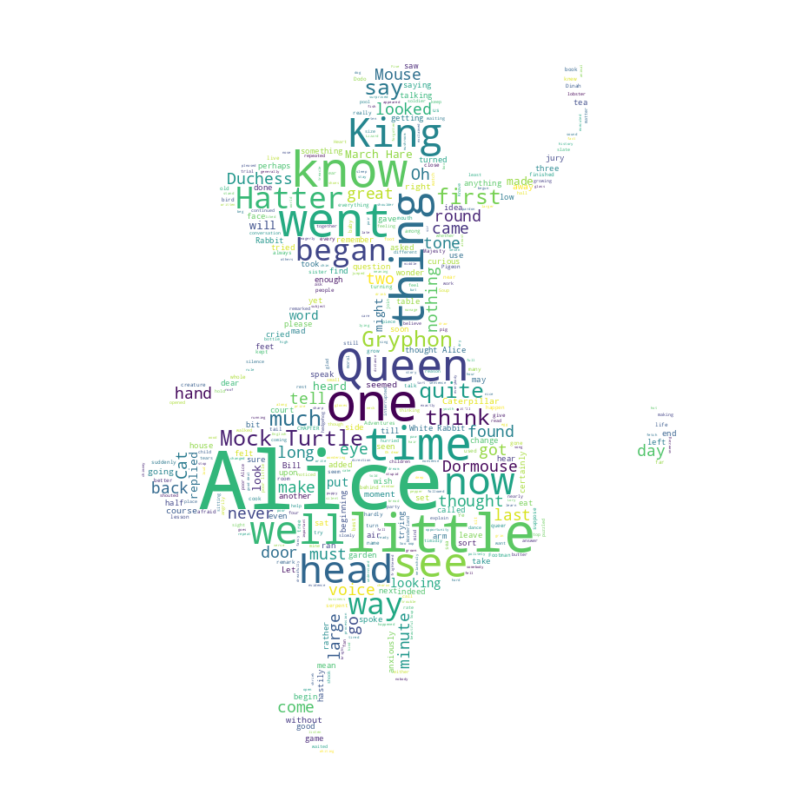

In [29]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Creating maps and visualizing Geospatial data

**About Folium**

Folium is a powerful Python library that uses JavaScript `leaflet.js` module in the background and it enables interactive map visualizations in Python. What is nice about **Folium** is that it was developed for the sole purpose of visualizing geospatial data.

Folium helps us create several types of Leaflet maps. The fact that the Folium results are interactive makes this library very useful for dashboard building.

From the official Folium documentation page:

> Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via Folium.

> Folium makes it easy to visualize data that's been manipulated in Python on an interactive Leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing Vincent/Vega visualizations as markers on the map.

> The library has a number of built-in tilesets from OpenStreetMap, Mapbox, and Stamen, and supports custom tilesets with Mapbox or Cloudmade API keys. Folium supports both GeoJSON and TopoJSON overlays, as well as the binding of data to those overlays to create choropleth maps with color-brewer color schemes.


In [30]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

#### Let's install **Folium**

In [31]:
# !pip3 install folium==0.5.0
import folium

Generating the world map is straightforward in **Folium**. We simply create a **Folium** *Map* object, and then display it. What is attractive about **Folium** maps is that they are interactive, so we can zoom into any region of interest despite the initial zoom level.

In [32]:
world_map = folium.Map()
world_map

We can customize this default definition of the world map by specifying the centre of the map, and the initial zoom level.

All locations on a map are defined by their respective *Latitude* and *Longitude* values. So we can create a map and pass in a center of *Latitude* and *Longitude* values of **[0, 0]**. 

For a defined center, we can also define the initial zoom level into that location when the map is rendered. **The higher the zoom level the more the map is zoomed into the center**.

Let's create a map centered around Bangladesh and play with the zoom level to see how it affects the rendered map.


In [33]:
# define the world map centered around Canada with a low zoom level
world_map = folium.Map(location=[23.6850, 90.3563], zoom_start=4)

# display world map
world_map

In [34]:
# define the world map centered around Canada with a higher zoom level
world_map = folium.Map(location=[23.6850, 90.3563], zoom_start=8)

# display world map
world_map

### A. Stamen Toner Maps

These are high-contrast B+W (black and white) maps. They are perfect for data mashups and exploring river meanders and coastal zones. 

Let's create the stamen toner map of Bangladesh


In [35]:
tiles = 'https://tiles.stadiamaps.com/tiles/stamen_toner/{z}/{x}/{y}{r}.png'
attr = ('&copy; <a href="https://www.stadiamaps.com/" target="_blank">Stadia Maps</a>'
        '&copy; <a href="https://www.stamen.com/" target="_blank">Stamen Design</a>'
        '&copy; <a href="https://openmaptiles.org/" target="_blank">OpenMapTiles</a>'
        '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors')

# create a Stamen Toner map of the world centered around Bangladesh
world_map = folium.Map(location=[23.6850, 90.3563], zoom_start=4, tiles=tiles, attr=attr)

# display map
world_map

### B. Stamen Terrain Maps

These are maps that feature hill shading and natural vegetation colors. They showcase advanced labeling and linework generalization of dual-carriageway roads.


In [36]:
tiles = 'https://tiles.stadiamaps.com/tiles/stamen_terrain/{z}/{x}/{y}{r}.png'
attr = ('&copy; <a href="https://www.stadiamaps.com/" target="_blank">Stadia Maps</a>'
        '&copy; <a href="https://www.stamen.com/" target="_blank">Stamen Design</a>'
        '&copy; <a href="https://openmaptiles.org/" target="_blank">OpenMapTiles</a>'
        '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors')

# create a Stamen Terrain map of the world centered around Bangladesh
world_map = folium.Map(location=[23.6850, 90.3563], zoom_start=8, tiles=tiles, attr=attr)

# display map
world_map

In [37]:
# !pip3 install --upgrade folium

### C. Stamen Watercolor Maps

These are maps that feature hill shading and natural vegetation colors. They showcase advanced labeling and linework generalization of dual-carriageway roads.


In [38]:
tiles = 'https://tiles.stadiamaps.com/tiles/stamen_watercolor/{z}/{x}/{y}.jpg'
attr = ('&copy; <a href="https://www.stadiamaps.com/" target="_blank">Stadia Maps</a>'
        '&copy; <a href="https://www.stamen.com/" target="_blank">Stamen Design</a>'
        '&copy; <a href="https://openmaptiles.org/" target="_blank">OpenMapTiles</a>'
        '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors')

# create a Stamen Watercolor map of the world centered around Bangladesh
world_map = folium.Map(location=[23.6850, 90.3563], zoom_start=4, tiles=tiles, attr=attr)

# display map
world_map

# Maps with Markers <a id="6"></a>

Let's download and import the data on police department incidents using *pandas* `read_csv()` method.

In [39]:
df_incidents = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')

df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [40]:
df_incidents.shape

(150500, 13)

So the dataframe consists of 150,500 crimes, which took place in the year 2016. In order to reduce computational cost, let's just work with the first 100 incidents in this dataset.

In [41]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

Now that we reduced the data a little, let's visualize where these crimes took place in the city of San Francisco. We will use the default style, and we will initialize the zoom level to 12.

In [42]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [43]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map

<br></br>
Now let's superimpose the locations of the crimes onto the map. The way to do that in **Folium** is to create a *feature group* with its own features and style and then add it to the `sanfran_map`.


In [44]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

We can also add some pop-up text that would get displayed when we hover over a marker. Let's make each marker display the category of the crime when hovered over.


In [45]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    
    
# add incidents to map
sanfran_map.add_child(incidents)

Add text to the circle markers themselves

In [46]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

# show map
sanfran_map

The other way is to group the markers into different clusters. Each cluster is then represented by the number of crimes in each neighborhood. These clusters can be thought of as pockets of San Francisco which you can then analyze separately.

To implement this, we start off by instantiating a *MarkerCluster* object and adding all the data points in the dataframe to this object.

In [47]:
# from folium.map import Marker
from folium.plugins import MarkerCluster

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

Here, when we zoom out all the way, all markers are grouped into one cluster, **the global cluster**, of 100 markers or crimes, which is the total number of crimes the dataframe used. Once we start zooming in, the *global cluster* starts breaking up into smaller clusters. Zooming in all the way results in individual markers.


# Choropleth Maps <a id="8"></a>

A `Choropleth` map is a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map, such as population density or per-capita income. The choropleth map provides an easy way to visualize how a measurement varies across a geographic area, or it shows the level of variability within a region. Below is a `Choropleth` map of the US depicting the population by square mile per state.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%205/images/2000_census_population_density_map_by_state.png" width="600"> 


Now, let's create a `Choropleth` map of the world depicting immigration from various countries to Canada from the datagrame `df_can` loaded above

In order to create a `Choropleth` map, we need a GeoJSON file that defines the areas/boundaries of the state, county, or country that we are interested in. In our case, since we are endeavoring to create a world map, we want a GeoJSON that defines the boundaries of all world countries.


In [48]:
# download countries geojson file
! wget --quiet https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json

In [49]:
world_geo = r'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

And now to create a `Choropleth` map, we will use the *choropleth* method with the following main parameters:

1. `geo_data`, which is the GeoJSON file.
2. `data`, which is the dataframe containing the data.
3. `columns`, which represents the columns in the dataframe that will be used to create the `Choropleth` map.
4. `key_on`, which is the key or variable in the GeoJSON file that contains the name of the variable of interest. To determine that, you will need to open the GeoJSON file using any text editor and note the name of the key or variable that contains the name of the countries, since the countries are our variable of interest. In this case, **name** is the key in the GeoJSON file that contains the name of the countries. Note that this key is case_sensitive, so you need to pass exactly as it exists in the GeoJSON file.


In [66]:
folium.Choropleth(
    geo_data=world_geo,
    data=df_can_copy,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
).add_to(world_map)

# display map
world_map

As per our `Choropleth` map legend, the darker the color of a country and the closer the color to red, the higher the number of immigrants from that country. Accordingly, the highest immigration over the course of 33 years (from 1980 to 2013) was from China, India, and the Philippines, followed by Poland, Pakistan, and interestingly, the US.


In [69]:
world_geo = r'world_countries.json'

# create a numpy array of length 6 and has linear spacing from the minimum total immigration to the maximum total immigration
threshold_scale = np.linspace(df_can['Total'].min(),
                              df_can['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2)

folium.Choropleth(
    geo_data=world_geo,
    data=df_can_copy,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
).add_to(world_map)

# display map
world_map